# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

## Trade union: Labour market model
In the following assignment, we have chosen to implement and solve the trade union model as presented in XX by ...  (XXXX). 

We consider a labour market with inelastic labour supply. Wages are chosen by unions who represent homogeneous agents 

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 

In [190]:
import numpy as np
import pandas as pd 
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns

# Predefine options for all plots
plt.style.use('seaborn-dark-palette')
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-",})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import our own code
from modelproject import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\bjark\AppData\Local\Temp\ipykernel_29988\1419958519.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark-palette')


c:\Users\bjark\Desktop\Python VScode\New folder\projects-2023-p-b\modelproject\modelproject.py:39: RuntimeWarning: divide by zero encountered in scalar power
  Y = (par.sigma/(par.sigma-1)*W)**-par.sigma
C:\Users\bjark\AppData\Local\Temp\ipykernel_29988\616250377.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'W': opt.W, 'L': opt.L, 'eta': eta, 'sigma': sigma}, ignore_index=True)
c:\Users\bjark\Desktop\Python VScode\New folder\projects-2023-p-b\modelproject\modelproject.py:39: RuntimeWarning: divide by zero encountered in scalar power
  Y = (par.sigma/(par.sigma-1)*W)**-par.sigma
C:\Users\bjark\AppData\Local\Temp\ipykernel_29988\616250377.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'W': opt.W, 'L': opt.L, 'eta': eta, 'sigma': sigma}, i

           W         L  eta     sigma
0   1.500000  0.104750  2.0  1.500000
1   1.291687  0.140002  2.0  1.631579
2   1.155151  0.177132  2.0  1.763158
3   1.058838  0.216569  2.0  1.894737
4   0.987183  0.258690  2.0  2.026316
5   0.931824  0.303923  2.0  2.157895
6   0.887756  0.352826  2.0  2.289474
7   0.851868  0.405841  2.0  2.421053
8   0.822021  0.463475  2.0  2.552632
9   0.796875  0.526334  2.0  2.684211
10  0.775391  0.595220  2.0  2.815789
11  0.756775  0.670261  2.0  2.947368
12  0.740479  0.752511  2.0  3.078947
13  0.726196  0.843030  2.0  3.210526
14  0.713501  0.941950  2.0  3.342105
15  0.712158  0.999522  2.0  3.473684
16  0.722656  0.999553  2.0  3.605263
17  0.732422  0.999548  2.0  3.736842
18  0.741516  0.999898  2.0  3.868421
19  0.750000  0.999675  2.0  4.000000


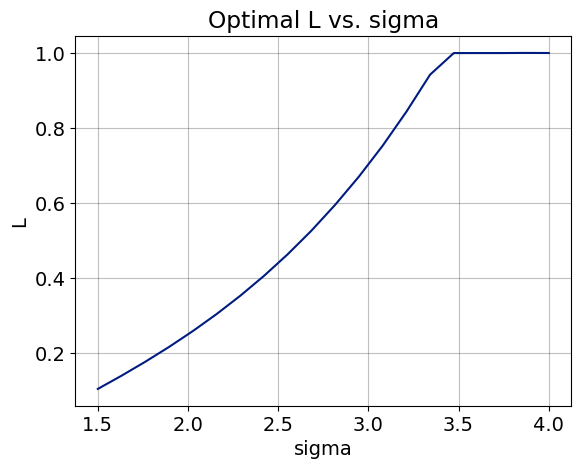

In [198]:
list_etas = np.linspace(0.8, 2, 5)
list_sigmas = np.linspace(1.5, 4, 20)
results_df = pd.DataFrame(columns=['W', 'L', 'eta', 'sigma'])

# We solve the model for each eta and sigma in the above vectors using a loop
for sigma in list_sigmas:
    model.par.sigma = sigma
    opt = model.solve() # Calling the model from the class
    results_df = results_df.append({'W': opt.W, 'L': opt.L, 'eta': eta, 'sigma': sigma}, ignore_index=True)

print(results_df)


fig, ax = plt.subplots()

ax.plot(results_df['sigma'], results_df['L'])
ax.set_xlabel('sigma')
ax.set_ylabel('L')
ax.set_title('Optimal L vs. sigma')
plt.show()


